In [1]:
import librosa
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plot
import matplotlib.pyplot as plt

from IPython.display import Audio
from pydub import AudioSegment

from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
from scipy.io import wavfile
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [8]:
from pydub import AudioSegment
import warnings
warnings.filterwarnings('ignore')

sys.path.append('/path/to/ffmpeg')

x, sr = librosa.load('test.mp3')
y, sr = librosa.load('test.mp3')

song = AudioSegment.from_mp3('test.mp3')


song.export("test.wav", format="wav")  # Is the same as:

sample_rate = 44100/2
Audio(x, rate=sample_rate)


sound = AudioSegment.from_wav("test.wav")
sound = sound.set_channels(1)
sound.export("test2.wav", format="wav")

<_io.BufferedRandom name='test2.wav'>

In [9]:
samplingFrequency, signalData = wavfile.read('test2.wav')

In [10]:
#samplingFrequency, signalData = wavfile.read('backup_2/test2.wav')

4


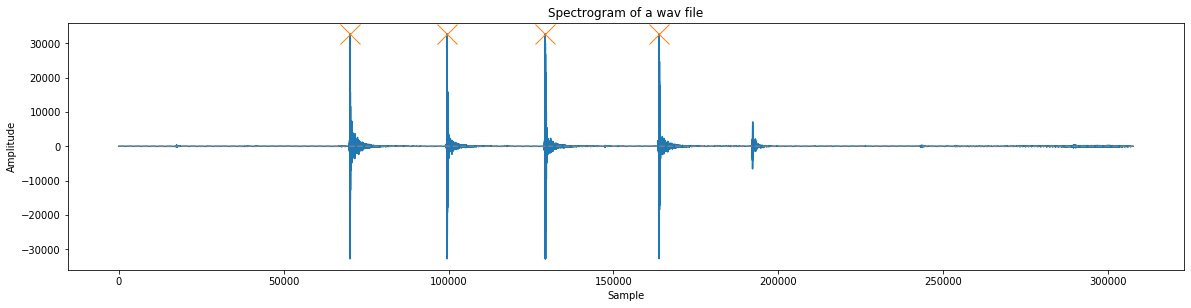

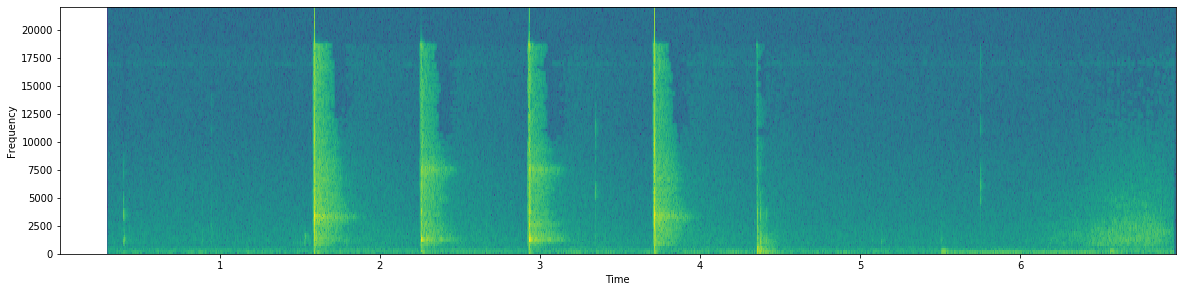

In [11]:
plt.figure(figsize=(20,10)) 

sr = 44100
a_max = 10000



plot.subplot(211)
plot.title('Spectrogram of a wav file') 

plot.plot(signalData)
x = signalData
peaks, _ = find_peaks(signalData, distance=1000, height=a_max)
print(len(peaks))
plot.plot(peaks, x[peaks], "x",markersize=20)
plot.plot(np.zeros_like(x), "--", color="gray")
plot.xlabel('Sample')
plot.ylabel('Amplitude')
plot.show()

plt.figure(figsize=(20,10))
plot.subplot(211)
Pxx, freqs, bins, im = plot.specgram(signalData,Fs=samplingFrequency)
plot.xlabel('Time')
plot.ylabel('Frequency')
plot.show()

[2.90249433e-03 5.80498866e-03 8.70748299e-03 ... 6.96598639e+00
 6.96888889e+00 6.97179138e+00]
[3445.3125, 1205.859375, 1205.859375, 3445.3125]
4


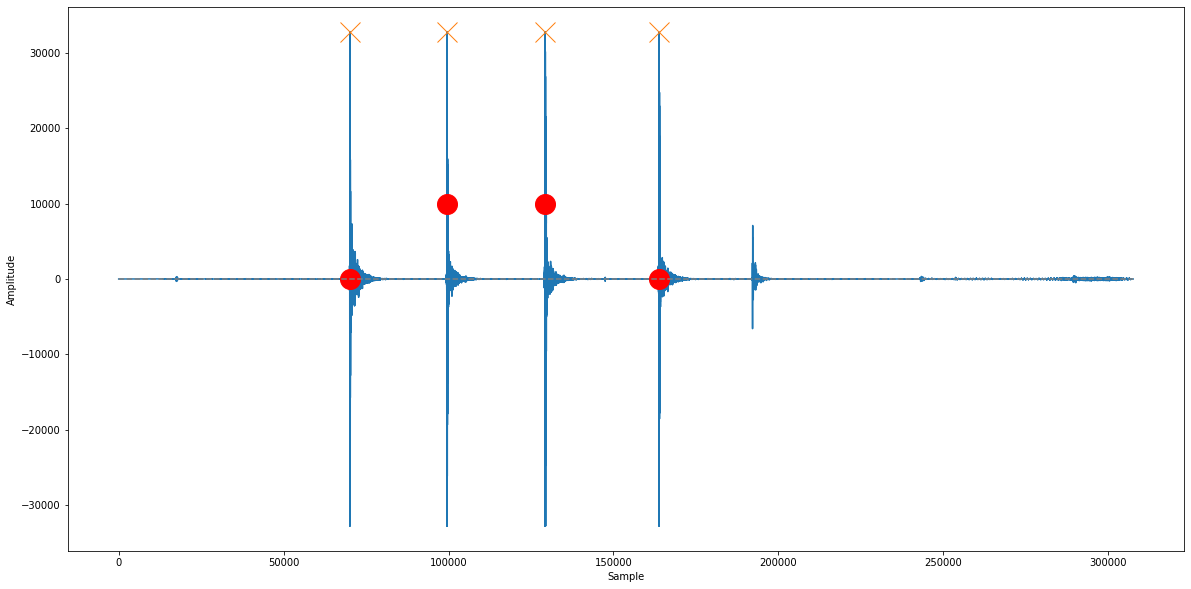

In [12]:
Pxx_np = np.asarray(Pxx)
freqs_np = np.asarray(freqs)
bins_np = np.asarray(bins)
bins_np_round_int = np.round(bins_np * sr)
print(bins_np)

# Save data to analysis using EXCEL
# np.savetxt("Pxx.csv", Pxx_np, delimiter=",")
# np.savetxt("freqs.csv", freqs_np, delimiter=",")
# np.savetxt("bins.csv", bins_np, delimiter=",")
# np.savetxt("signalData.csv", np.asarray(signalData), delimiter=",")
# df.to_csv('data_backup.csv')

import pandas as pd
df = pd.DataFrame(data=Pxx_np,index=freqs_np,columns=bins_np) 

_peaks = peaks/sr

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

hz_array = []

array = bins_np

for element in _peaks:
    hz_array.append(df[array[int(find_nearest(array, element))]].idxmax())
#     print(find_nearest(bins_np, value))
#     print(bins_np[int(find_nearest(array, value))])
#     print(element)
#     print(df[array[int(find_nearest(array, element))]].idxmax())
    
print(hz_array)

kmeans = KMeans(n_clusters=2)
clusterd_array = kmeans.fit_predict(np.array(hz_array).reshape(-1, 1))

plt.figure(figsize=(20,10)) 

plot.plot(signalData)
x = signalData
peaks, _ = find_peaks(signalData, distance=1000, height=a_max)
print(len(peaks))
plot.plot(peaks, x[peaks], "x",markersize=20)
plot.plot(peaks, clusterd_array*10000, "ro",markersize=20)
plot.plot(np.zeros_like(x), "--", color="gray")
plot.xlabel('Sample')
plot.ylabel('Amplitude')
plot.show()

[3445.3125, 1205.859375, 1205.859375, 3445.3125]
number of estimated clusters : 2
[0 1 1 0]
[3445.3125, 1205.859375, 1205.859375, 3445.3125]


Text(0.5, 1.0, 'Power spectrogram')

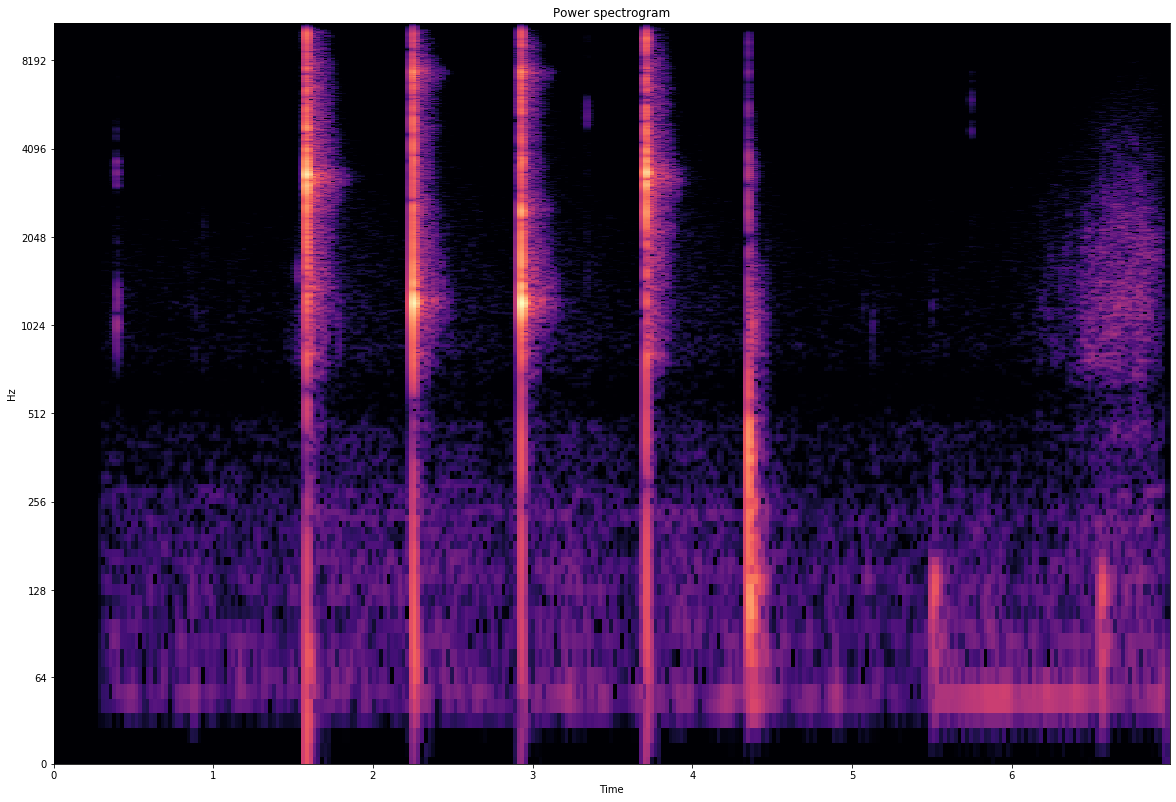

In [13]:
print(hz_array)
# #############################################################################
# Generate sample data
X = hz_array
X = np.reshape(X, (-1, 1))

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
# bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)

ms = MeanShift(bandwidth=None, bin_seeding=False)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print(labels)
print(hz_array)

#####################

import matplotlib.pyplot as plt
import librosa.display
D = np.abs(librosa.stft(y))

plt.figure(figsize=(20,30))

ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')
# plt.subplot(2, 1, 2, sharex=ax1)
# plt.plot(times, o_env, label='Onset strength')
# plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
# plt.axis('tight')
# plt.legend(frameon=True, framealpha=0.75)
# plt.show()

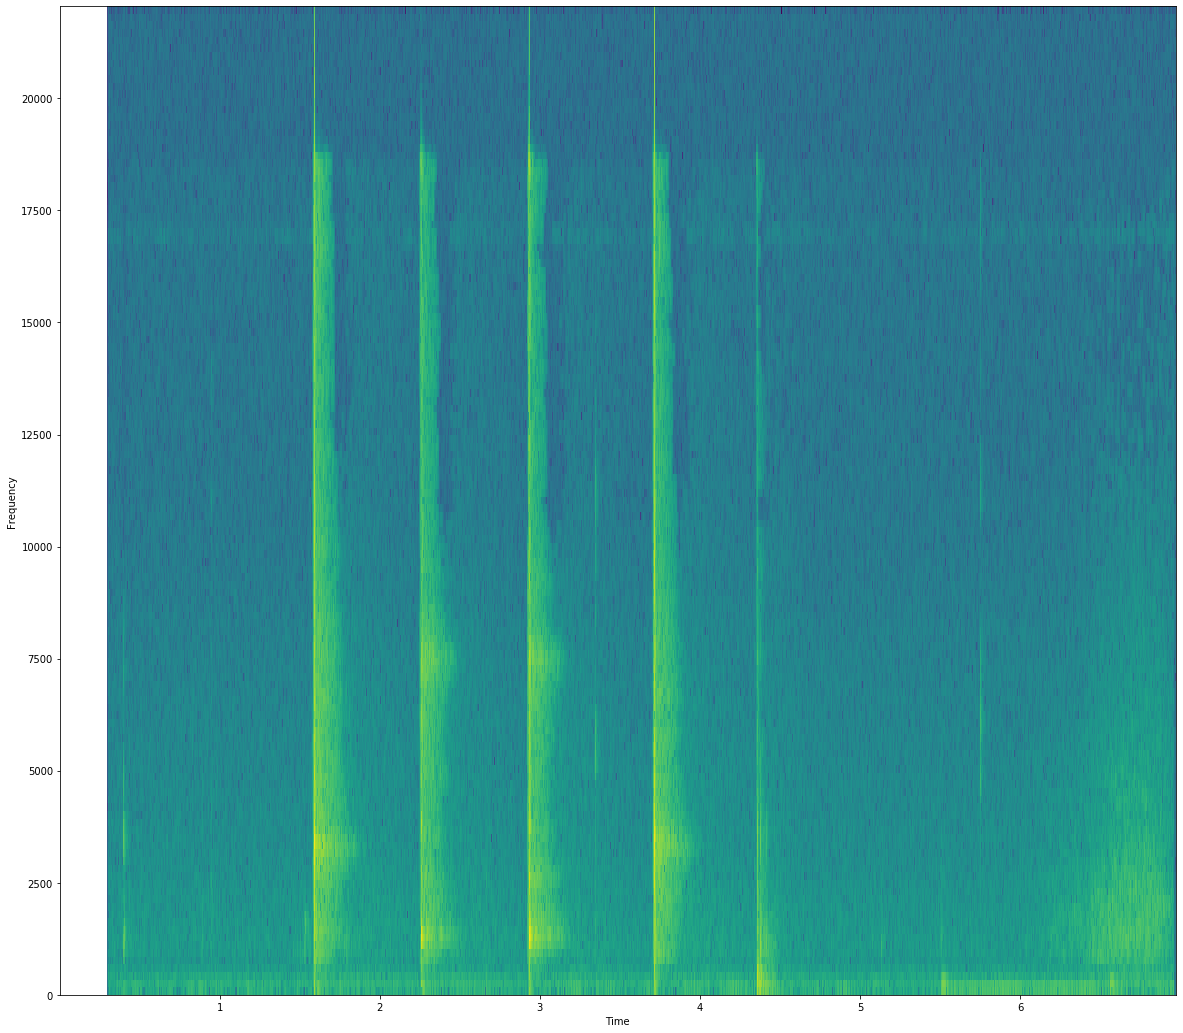

In [14]:
plt.figure(figsize=(20,40))
plot.subplot(211)
Pxx, freqs, bins, im = plot.specgram(signalData,Fs=samplingFrequency)
plot.xlabel('Time')
plot.ylabel('Frequency')
plot.show()